## Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [3]:
# Read_rating_data
ratings_columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./dataset/ml-100k/u.data', sep='\t', names=ratings_columns)

# Read_data_movie
movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('./dataset/ml-100k/u.item', sep='|', names=movie_columns, usecols=range(5), encoding='latin-1')

# Merge data
data = pd.merge(ratings, movies, on='movie_id')

In [4]:
print(data.head())
print(data.info())
print(data.describe())

   user_id  movie_id  rating  unix_timestamp         title release_date  \
0      196       242       3       881250949  Kolya (1996)  24-Jan-1997   
1       63       242       3       875747190  Kolya (1996)  24-Jan-1997   
2      226       242       5       883888671  Kolya (1996)  24-Jan-1997   
3      154       242       3       879138235  Kolya (1996)  24-Jan-1997   
4      306       242       5       876503793  Kolya (1996)  24-Jan-1997   

   video_release_date                                         imdb_url  
0                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
1                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
2                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
3                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
4                 NaN  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #

## Data visualization

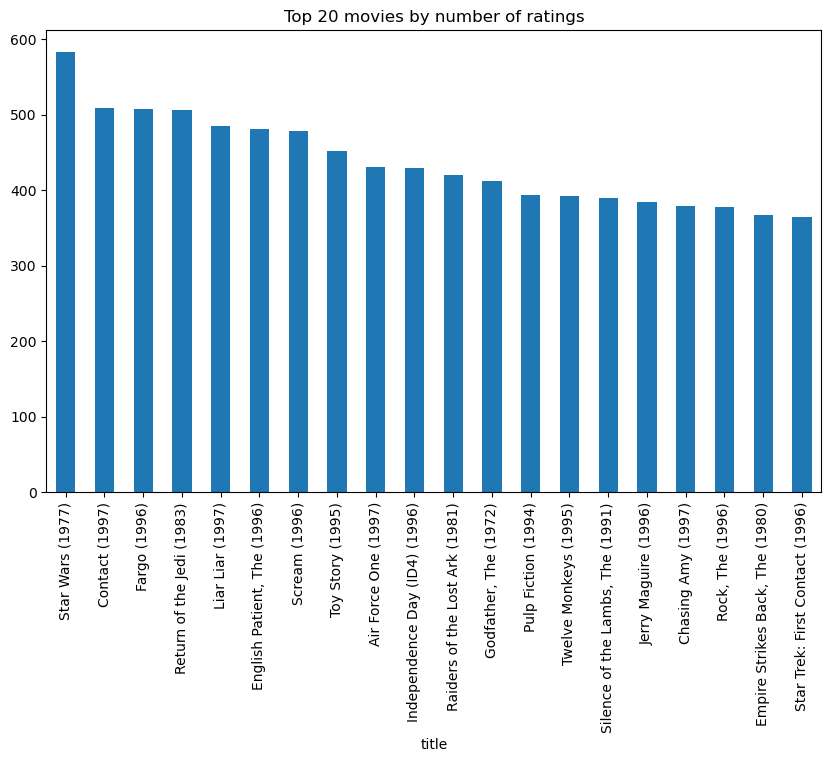

In [5]:
movie_ratings_count = data.groupby('title').size().sort_values(ascending=False)
plt.figure(figsize=(10,6))
movie_ratings_count[:20].plot(kind='bar')
plt.title("Top 20 movies by number of ratings")
plt.show()

## Recommendation system

In [9]:
# Compute movie similarity based on user ratings
movie_similarity = cosine_similarity(user_movie_rating.T.fillna(0))
movie_similarity_df = pd.DataFrame(movie_similarity, index=user_movie_rating.columns, columns=user_movie_rating.columns)

In [21]:
def recommend_movies_based_on_movie_name(movie_name, num_movies=5):
    if movie_name not in movie_similarity_df.columns:
        return ["Movie not in database."]
    else:
        similar_movies = movie_similarity_df[movie_name].sort_values(ascending=False)
        return list(similar_movies.index[1:num_movies+1])


In [22]:
movie_name_input = "Star Wars (1977)"
recommend = recommend_movies_based_on_movie_name(movie_name_input)

In [31]:
print(*recommend,sep = '\n')

Return of the Jedi (1983)
Raiders of the Lost Ark (1981)
Empire Strikes Back, The (1980)
Toy Story (1995)
Godfather, The (1972)
